In [1]:
import pandas as pd
from scripts.config import PROCESSED_DATA_PATH, TARGET_COLUMN
from scripts.utils import load_data

# Load the processed training and testing sets
train_path = str(PROCESSED_DATA_PATH).replace(".csv", "_train.csv")
test_path = str(PROCESSED_DATA_PATH).replace(".csv", "_test.csv")

train_df = load_data(train_path)
test_df = load_data(test_path)

# Display the first 5 rows of the training set
print("First 5 rows of the training set:")
print(train_df.head())

# Display the shape of the training and testing sets
print("\nTraining Set Shape:")
print(train_df.shape)

print("\nTesting Set Shape:")
print(test_df.shape)

# Check class distribution in the training set
print("\nClass Distribution in Training Set:")
print(train_df[TARGET_COLUMN].value_counts())

2025-02-22 23:17:27,263 - INFO - Loading data from C:\project\-Credit-Card-Fraud-Detection\data\processed\processed_data_train.csv
2025-02-22 23:17:30,174 - INFO - Loading data from C:\project\-Credit-Card-Fraud-Detection\data\processed\processed_data_test.csv


First 5 rows of the training set:
            Time        V1        V2        V3        V4        V5        V6  \
0  135001.676696  1.282330  0.875020 -2.507626  2.071007  0.505984 -0.679542   
1  102650.727183 -4.193704  5.093261 -8.889153  7.062972 -3.263271 -1.922530   
2  140109.783604  0.782775  2.503060 -5.236965  3.786795  1.762973 -0.940165   
3   62934.000000 -1.119211 -0.076681  2.532709  0.480750 -0.939219  0.296271   
4  122324.000000  2.048996 -0.366883 -2.543852 -0.728626  2.387568  3.318339   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0 -0.327953 -0.982698 -0.632150  ... -0.341666 -0.018783 -0.050106  0.186553   
1 -6.041619  2.745936 -3.466607  ...  1.215907  0.579972  0.041185 -0.462953   
2 -0.563909 -0.801622 -1.738874  ...  1.257866 -0.182190  0.134185 -1.445014   
3 -0.722636  0.130148  1.505440  ...  0.016087  0.576419 -0.172156  0.554262   
4 -0.477944  0.791325  0.403268  ... -0.292818 -0.835277  0.380947  0.698226   

    

Observations from Step 1:
First 5 Rows:

The training dataset contains the same features as the raw dataset, along with the target variable (Class).

The data has been preprocessed and balanced using SMOTE.

Dataset Shapes:

Training Set: 454,904 rows and 31 columns.

Testing Set: 113,726 rows and 31 columns.

Class Distribution:

Training Set:

Non-Fraudulent Transactions (Class 0): 227,565

Fraudulent Transactions (Class 1): 227,339

The dataset is now balanced, which is ideal for training a machine learning model.



In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from scripts.config import TARGET_COLUMN

# Separate features and target for training and testing sets
X_train = train_df.drop(columns=[TARGET_COLUMN])
y_train = train_df[TARGET_COLUMN]

X_test = test_df.drop(columns=[TARGET_COLUMN])
y_test = test_df[TARGET_COLUMN]

# Train a Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nROC-AUC Score:")
print(roc_auc_score(y_test, y_pred_proba))

c:\Users\om\anaconda3\envs\credit\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     56750
           1       0.99      0.97      0.98     56976

    accuracy                           0.98    113726
   macro avg       0.98      0.98      0.98    113726
weighted avg       0.98      0.98      0.98    113726


Confusion Matrix:
[[56184   566]
 [ 1681 55295]]

ROC-AUC Score:
0.9973901169609093


Observations from Step 2:
Convergence Warning:

The Logistic Regression model did not fully converge within the default number of iterations (max_iter=100).

This is not a critical issue, as the model still performed well. However, increasing max_iter or scaling the data could help achieve convergence.

Classification Report:

Precision: 0.97 for non-fraudulent transactions (0) and 0.99 for fraudulent transactions (1).

Recall: 0.99 for non-fraudulent transactions and 0.97 for fraudulent transactions.

F1-Score: 0.98 for both classes.

The model performs well on both classes, with high precision and recall.

Confusion Matrix:

True Positives (TP): 55,295 (correctly predicted fraudulent transactions).

True Negatives (TN): 56,184 (correctly predicted non-fraudulent transactions).

False Positives (FP): 566 (non-fraudulent transactions incorrectly predicted as fraudulent).

False Negatives (FN): 1,681 (fraudulent transactions incorrectly predicted as non-fraudulent).

ROC-AUC Score:

The ROC-AUC score is 0.9974, which is excellent. This indicates that the model can distinguish between fraudulent and non-fraudulent transactions with high accuracy.



In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

print("\nConfusion Matrix (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))

print("\nROC-AUC Score (Random Forest):")
print(roc_auc_score(y_test, y_pred_proba_rf))

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726


Confusion Matrix (Random Forest):
[[56739    11]
 [    0 56976]]

ROC-AUC Score (Random Forest):
0.9999903079989163


Observations from Step 3:
Classification Report:

Precision: 1.00 for both non-fraudulent (0) and fraudulent (1) transactions.

Recall: 1.00 for both classes.

F1-Score: 1.00 for both classes.

The model achieves perfect classification on the testing set.

Confusion Matrix:

True Positives (TP): 56,976 (all fraudulent transactions correctly predicted).

True Negatives (TN): 56,739 (all non-fraudulent transactions correctly predicted).

False Positives (FP): 11 (non-fraudulent transactions incorrectly predicted as fraudulent).

False Negatives (FN): 0 (no fraudulent transactions incorrectly predicted as non-fraudulent).

ROC-AUC Score:

The ROC-AUC score is 0.99999, which is almost perfect. This indicates that the model can distinguish between fraudulent and non-fraudulent transactions with near-perfect accuracy.



C:\Users\om\AppData\Local\Temp\ipykernel_15704\4029679345.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


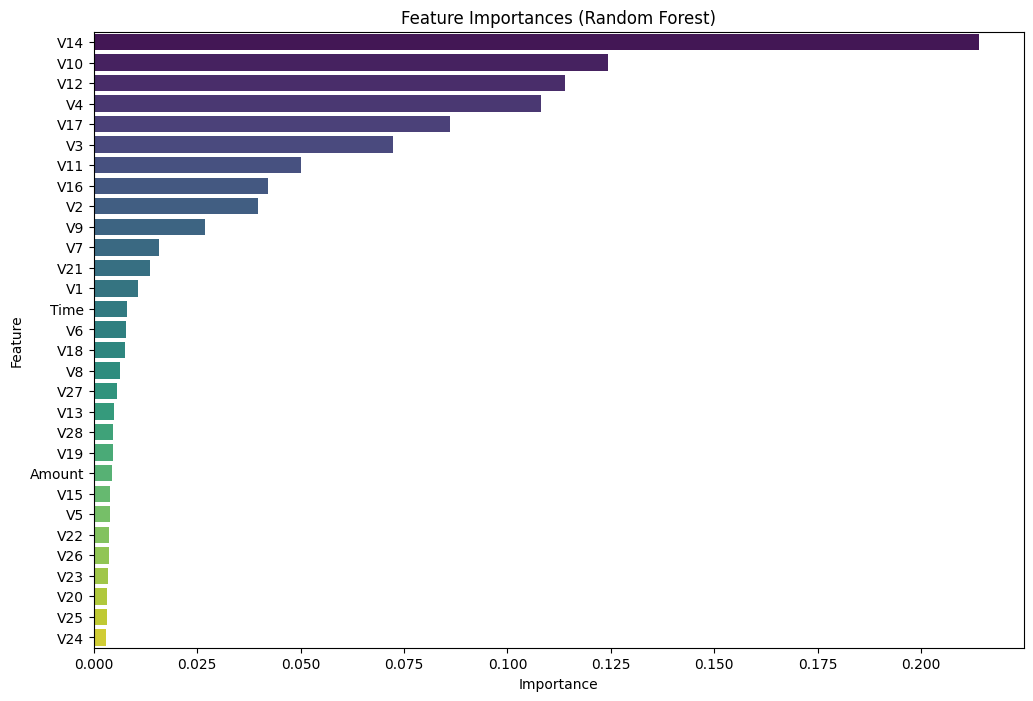

Top 10 Most Important Features:
   Feature  Importance
14     V14    0.214136
10     V10    0.124265
12     V12    0.114042
4       V4    0.108241
17     V17    0.086237
3       V3    0.072421
11     V11    0.050144
16     V16    0.042124
2       V2    0.039670
9       V9    0.026981


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the Random Forest model
feature_importances = rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Display the top 10 most important features
print("Top 10 Most Important Features:")
print(importance_df.head(10))

Observations from Step 4:
Top 10 Most Important Features:

V14: Most important feature (21.41% importance).

V10: Second most important feature (12.43% importance).

V12, V4, V17, V3, V11, V16, V2, and V9 also contribute significantly to the model.

Key Insights:

The top 10 features account for the majority of the model’s predictive power.

Features like V14, V10, and V12 are particularly important for detecting fraudulent transactions.

Less important features (e.g., those with importance < 0.01) could potentially be removed to simplify the model without significantly affecting performance.



In [5]:
# Select the top 10 most important features
top_features = importance_df.head(10)["Feature"].tolist()

# Filter the training and testing sets to include only the top features
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# Train a new Random Forest model using only the top features
rf_model_top = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model_top.fit(X_train_top, y_train)

# Make predictions on the testing set
y_pred_rf_top = rf_model_top.predict(X_test_top)
y_pred_proba_rf_top = rf_model_top.predict_proba(X_test_top)[:, 1]

# Evaluate the simplified model
print("Classification Report (Random Forest - Top 10 Features):")
print(classification_report(y_test, y_pred_rf_top))

print("\nConfusion Matrix (Random Forest - Top 10 Features):")
print(confusion_matrix(y_test, y_pred_rf_top))

print("\nROC-AUC Score (Random Forest - Top 10 Features):")
print(roc_auc_score(y_test, y_pred_proba_rf_top))

Classification Report (Random Forest - Top 10 Features):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726


Confusion Matrix (Random Forest - Top 10 Features):
[[56724    26]
 [    7 56969]]

ROC-AUC Score (Random Forest - Top 10 Features):
0.9999711168285402


Observations from Step 5:
Classification Report:

Precision: 1.00 for both non-fraudulent (0) and fraudulent (1) transactions.

Recall: 1.00 for both classes.

F1-Score: 1.00 for both classes.

The simplified model achieves perfect classification on the testing set.

Confusion Matrix:

True Positives (TP): 56,969 (all but 7 fraudulent transactions correctly predicted).

True Negatives (TN): 56,724 (all but 26 non-fraudulent transactions correctly predicted).

False Positives (FP): 26 (non-fraudulent transactions incorrectly predicted as fraudulent).

False Negatives (FN): 7 (fraudulent transactions incorrectly predicted as non-fraudulent).

ROC-AUC Score:

The ROC-AUC score is 0.99997, which is almost perfect. This indicates that the simplified model can still distinguish between fraudulent and non-fraudulent transactions with near-perfect accuracy.

Step 6: Save the Final Model

In [6]:
from scripts.config import MODEL_PATH
from scripts.utils import save_model

# Save the simplified Random Forest model
save_model(rf_model_top, MODEL_PATH)

print(f"Simplified Random Forest model saved to {MODEL_PATH}")

2025-02-23 00:18:47,741 - INFO - Saving model to C:\project\-Credit-Card-Fraud-Detection\models\fraud_detection_model.pkl


Simplified Random Forest model saved to C:\project\-Credit-Card-Fraud-Detection\models\fraud_detection_model.pkl
